<a href="https://colab.research.google.com/github/IbrahimHammed/PythonVisualizations/blob/main/DiamondsEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA - Exploratory Data Analysis**

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://github.com/IbrahimHammed/PythonVisualizations/blob/main/DiamondPrices2022.csv?raw=true"

In [ ]:
# WRANGLING: INGESTED, CLEANING UP: DROPPING, REPLACING, TRANSFORM, ETL

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [7]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [8]:
df.table.unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

In [10]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [11]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
dfClean = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x','y','z']]

In [15]:
dfClean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [29]:
dfCorrelation = dfClean[['carat','table', 'price', 'depth', 'x', 'y', 'z']]

In [16]:
dfClean.shape

(53943, 10)

In [17]:
df.shape

(53943, 11)

In [19]:
# record volume by cut
dfClean.cut.value_counts()

,count
cut,
Ideal,21551
Premium,13793
Very Good,12083
Good,4906
Fair,1610


In [22]:
# dfClean.groupby('cut').count()

In [23]:
dfClean.color.value_counts()

,count
color,
G,11292
E,9799
F,9543
H,8304
D,6775
I,5422
J,2808


In [ ]:
# Method 2


In [24]:
# Clarity summary
dfClean.clarity.value_counts()

,count
clarity,
SI1,13067
VS2,12259
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


In [30]:
# correlation analysis
dfCorrelation.corr()

,carat,table,price,depth,x,y,z
carat,1.000000,0.181602,0.921591,0.028234,0.975093,0.951721,0.953387
table,0.181602,1.000000,0.127118,-0.295798,0.195333,0.183750,0.150915
price,0.921591,0.127118,1.000000,-0.010630,0.884433,0.865419,0.861249
depth,0.028234,-0.295798,-0.010630,1.000000,-0.025289,-0.029340,0.094927
x,0.975093,0.195333,0.884433,-0.025289,1.000000,0.974701,0.970771
y,0.951721,0.183750,0.865419,-0.029340,0.974701,1.000000,0.952005
z,0.953387,0.150915,0.861249,0.094927,0.970771,0.952005,1.000000


<Axes: >

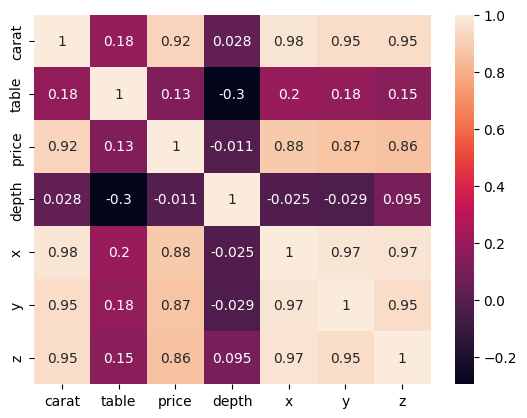

In [31]:
sns.heatmap(dfCorrelation.corr(), annot=True)